In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import os

from scipy.interpolate import interp1d

pi = math.pi

In [5]:
#lcp = np.loadtxt('lcpSpectrum.txt')
#rcp = np.loadtxt('rcpSpectrum.txt')

#orderarr = np.loadtxt('orderlist.txt', dtype=int)

cdarr_raw = np.loadtxt('NCircularDichroismVsMagneticFlux_HM.dat')

In [6]:
marr_raw = cdarr_raw[:, 0]
cdarr_raw = cdarr_raw[:, 1:]
print(marr_raw)

[0.   0.06 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.16
 1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5
 2.6  2.7  2.8  2.9  3.   3.1  3.14]


In [10]:

Ndat = len(marr_raw)*2 - 1
Norder = len(cdarr_raw[0, :])

In [15]:
cdarr = np.zeros( (Ndat, Norder) )
marr = np.zeros( Ndat )

cdarr[(Ndat-1)//2:, :] = cdarr_raw
marr[(Ndat-1)//2:] = marr_raw
for i in range((Ndat-1)//2):
    marr[i] = -marr_raw[(Ndat-1)//2-i]
    cdarr[i, :] = -cdarr_raw[(Ndat-1)//2-i, :]

#print(marr)
print(",".join([str(item) for item in marr]) )
print(cdarr)

-3.14,-3.1,-3.0,-2.9,-2.8,-2.7,-2.6,-2.5,-2.4,-2.3,-2.2,-2.1,-2.0,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.16,-1.1,-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,-0.06,0.0,0.06,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.16,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.14
[[ 4.62417267e-02  2.26910938e-01  7.88774129e-02 -3.98724001e-02
   4.24326970e-02]
 [ 9.25950053e-01  7.37317697e-01  8.33633428e-01 -1.48499598e-01
   7.72266125e-01]
 [ 8.84394518e-01  8.71276249e-01  7.07647067e-01 -4.32532874e-02
  -3.54101786e-01]
 [ 5.82708025e-01  3.22094821e-01  6.66744742e-01  9.53485069e-01
  -5.98678868e-01]
 [ 1.58130919e-02 -3.59547395e-01  8.72398311e-01  9.79800032e-01
   7.49674571e-01]
 [ 2.05038061e-01  2.09150450e-01  3.27589846e-01 -4.02543745e-01
  -9.01029851e-01]
 [-8.27954616e-01 -8.30494365e-01 -7.92934775e-01 -9.12378445e-01
  -2.35768853e-01]
 [-9.66183869e-01 -9.90190706e-01 -9.98053366e-01 -9.99636302e-01
  -9.97139073e-01]
 [-9

In [13]:
orderarr = [10, 13, 16, 19, 22]


Length egap =  11    Np  =  11

egap =  [0.12658622 0.011457   0.1094454  0.12395424 0.06930847 0.05365902
 0.05365902 0.06930847 0.12395424 0.1094454  0.011457  ]


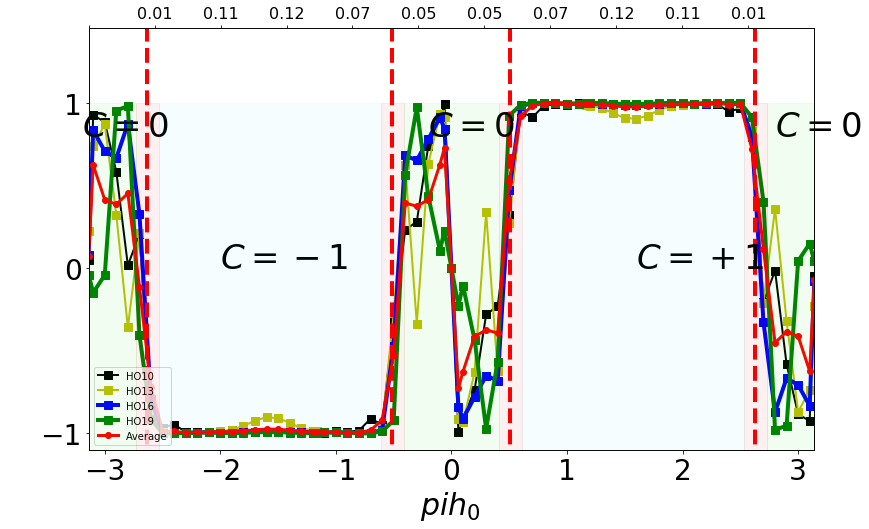

In [16]:
egap = [0.1265862166344733,
0.11619702700797555,
0.09033594641136708,
0.06484120091869144,
0.03996752559946905,
0.01596344999534577,
0.006931185104934651,
0.028487624075410306,
0.04849048210349949,
0.06673989724385138,
0.08305352737283811,
0.09726837209078013,
0.1092424013680586,
0.11866203583248106,
0.12228065908185053,
0.12415343413023934,
0.12491074279784715,
0.12472255708327563,
0.12353406957990119,
0.12105699634814049,
0.11515085773029385,
0.11119243473946938,
0.10454246415586044,
0.09162057481734434,
0.07651430096160733,
0.059374579483545714,
0.04037266481452956,
0.019698417804733886,
0.0024415913037169473,
0.025826146858325252,
0.05022159810989581,
0.07538419377358688,
0.10106251751117518,
0.11142089412283189,
0.127,
0.11142089412283189,
0.10106251751117518,
0.07538419377358688,
0.05022159810989581,
0.025826146858325252,
0.0024415913037169473,
0.019698417804733886,
0.04037266481452956,
0.059374579483545714,
0.07651430096160733,
0.09162057481734434,
0.10454246415586044,
0.11119243473946938,
0.11515085773029385,
0.12105699634814049,
0.12353406957990119,
0.12472255708327562,
0.12491074279784717,
0.12415343413023933,
0.12228065908185048,
0.11866203583248104,
0.1092424013680586,
0.09726837209078013,
0.08305352737283811,
0.06673989724385138,
0.04849048210349949,
0.028487624075410306,
0.006931185104934651,
0.01596344999534577,
0.03996752559946905,
0.06484120091869144,
0.09033594641136708,
0.11619702700797555,
0.1265862166344733]

# match same parameters with Alexis
width = 12.
hight = width/1.62

fig     = plt.figure(figsize=(width,hight) )
ax      = fig.add_axes([0.135, 0.14, 0.84, 0.79])

averagearr = np.zeros(Ndat)
for i in range(Ndat):
    for j in range(Norder):
        averagearr[i] += cdarr[i, j]
    averagearr[i] /= Norder
sw=8
int0=0
p4,=plt.plot(marr, cdarr[:, 0], 'ks-', lw=2,markersize=sw )
p5,=plt.plot(marr, cdarr[:, 1], 'ys-', lw=2,markersize=sw )
p6,=plt.plot(marr, cdarr[:, 2], 'bs-', lw=4,markersize=sw )
p7,=plt.plot(marr, cdarr[:, 3], 'gs-', lw=4,markersize=sw )

p9,=plt.plot(marr, averagearr, 'ro-', lw=3 )
plt.legend([p4, p5, p6, p7,  p9], ['HO10','HO13','HO16','HO19','Average'],loc='lower left')

plt.xlabel(r'$ pih_0$ ', fontsize=30)

plt.ylabel('  ', fontsize=30)
plt.tick_params(labelsize=28)


xmin    = -max(marr)
xmax    = max(marr)
ymin    = -1.22
ymax    = 1.45
shift0  = 0.1
#xdown   = 0
xdown = math.asin(-2.54/(3*math.sqrt(3.)))
#xup     = 3.*np.sqrt(3.)
xup = math.asin(2.54/(3*math.sqrt(3.)))
plt.ylim( ymin, ymax )
plt.xlim( xmin, xmax )
plt.plot([xup,xup],     [-ymax,ymax],    'r--',  lw=4)
plt.plot([xdown,xdown], [-ymax,ymax],    'r--',  lw=4)
plt.plot([pi-xup,pi-xup],     [-ymax,ymax],    'r--',  lw=4)
plt.plot([-pi-xdown,-pi-xdown], [-ymax,ymax],    'r--',  lw=4)

#plt.text(.2, 1.26, "(d)", fontsize=34, color="k")

plt.text(-3.2, 0.8, r"$C=0$", fontsize=34, color="k")
plt.text(-2.0, 0.0, r"$C=-1$", fontsize=34, color="k")
plt.text(-0.2, 0.8, r"$C=0$", fontsize=34, color="k")
plt.text(1.6, 0.0, r"$C=+1$", fontsize=34, color="k")
plt.text(2.8, 0.8, r"$C=0$", fontsize=34, color="k")

ax1     = plt.gca()
ax2     = ax1.twiny()

Mt2New  = np.arange(-max(marr),max(marr),2*max(marr)/11.)
ax2.set_xticks( Mt2New )
Npt2    = len(Mt2New)

f       = interp1d( marr, egap, kind='cubic' )
egap1   = f(Mt2New)
ticks1  = []
print('\nLength egap = ', len(egap1), '   Np  = ', Npt2)
for n in range(0,Npt2):
    if n==0:
        ticks1.append(' ')
    else:
        ticks1.append('%.2f'%(egap1[n]*1.))
print('\negap = ',egap1)
plt.yticks([-1,0,1])
ax2.set_xticklabels(ticks1)
ax2.set_xlim( xmin, xmax )
shift0  = 0.1
hd      = -1.1

plt.fill_between( [-pi, (-pi-xdown)-shift0], [1,1], [hd,hd], color=[0.0,0.9,0.], alpha=0.057 )
plt.fill_between( [(-pi-xdown)-shift0, (-pi-xdown)+shift0], [1,1], [hd,hd], color=[0.8,0.0,0.], alpha=0.057 )
plt.fill_between( [(-pi-xdown)+shift0,xdown-shift0], [1,1], [hd,hd], color=[0.0,0.8,0.99], alpha=0.04 )
plt.fill_between( [xdown-shift0, xdown+shift0], [1,1], [hd,hd], color=[0.8,0.0,0.], alpha=0.057 )
plt.fill_between( [xdown+shift0, xup-shift0], [1,1], [hd,hd], color=[0.0,0.9,0.], alpha=0.057 )
plt.fill_between( [xup-shift0,xup+shift0], [1,1], [hd,hd], color=[0.8,0.0,0.], alpha=0.057 )
plt.fill_between( [xup+shift0,pi-xup-shift0], [1,1], [hd,hd], color=[0.0,0.8,0.99], alpha=0.04 )
plt.fill_between( [pi-xup-shift0, pi-xup+shift0], [1,1], [hd,hd], color=[0.8,0.0,0.], alpha=0.057 )
plt.fill_between( [pi-xup+shift0, pi], [1,1], [hd,hd], color=[0.0,0.9,0.], alpha=0.057 )

#plt.fill_between( [xdown,xup-shift0], [1,1], [hd,hd], color=[0.0,0.8,0.99], alpha=0.04 )
#plt.fill_between( [xup-shift0, xup+shift0], [1,1], [hd,hd], color=[0.8,0.0,0.], alpha=0.057 )
#plt.fill_between( [xup+shift0, max(marr)], [1,1], [hd,hd], color=[0.0,0.9,0.], alpha=0.057 )
xmin    =  -max(marr)
xmax    =  max(marr)
ymin    = -1.1
ymax    =  1.45;#1.25
plt.tick_params( labelsize=16 )
plt.ylim( ymin, ymax )
plt.xlim( xmin, xmax )
fname='Dichroism__phi0_-pi_pi__.pdf'
fileName     = fname
plt.savefig(fileName, dpi = 400)

plt.show()